In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [5]:
df.shape

(100, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [9]:
df = df.iloc[:,1:]

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [11]:
import matplotlib.pyplot as plt

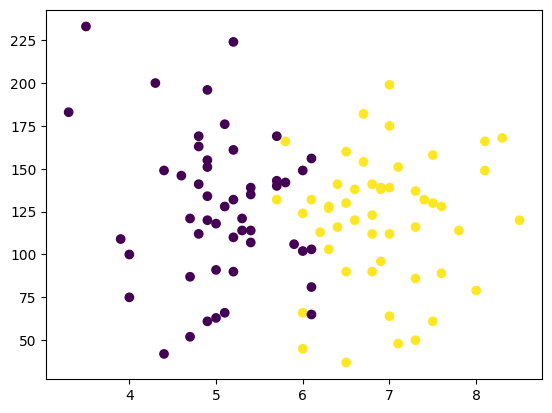

In [13]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [14]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
x

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [16]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [19]:
x_train

,cgpa,iq
97,6.7,182
10,6.0,45
49,5.4,135
13,6.4,116
37,8.1,149
...,...,...
80,4.9,196
12,5.4,139
66,6.9,96
56,6.1,65


In [20]:
y_train

,placement
97,1
10,1
49,0
13,1
37,1
...,...
80,0
12,0
66,1
56,0


In [21]:
x_test

,cgpa,iq
92,5.2,110
40,4.9,134
45,6.0,66
0,6.8,123
60,6.9,139
70,6.3,127
2,5.3,121
96,4.4,42
99,6.2,113
64,7.0,64


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)

In [25]:
x_train

array([[ 6.00249594e-01,  1.40903617e+00],
       [-9.54291882e-04, -2.02376683e+00],
       [-5.16271908e-01,  2.31359229e-01],
       [ 3.42590786e-01, -2.44722939e-01],
       [ 1.80265737e+00,  5.82156616e-01],
       [ 6.86135863e-01,  3.81700966e-01],
       [-9.45703255e-01, -1.62285553e+00],
       [ 2.14620244e+00, -1.44495114e-01],
       [-1.03158952e+00,  3.81700966e-01],
       [-5.16271908e-01, -2.94836851e-01],
       [-2.14811103e+00,  2.68694094e+00],
       [-9.45703255e-01, -1.44495114e-01],
       [ 1.80265737e+00,  1.00812487e+00],
       [ 1.11556721e+00,  2.81473141e-01],
       [-9.54291882e-04, -5.95520326e-01],
       [-6.88044447e-01,  8.82840090e-01],
       [-6.88044447e-01,  2.46142833e+00],
       [ 3.42590786e-01,  3.81700966e-01],
       [ 1.28733975e+00,  8.07669222e-01],
       [ 1.37322602e+00, -9.21260756e-01],
       [ 8.57908402e-01,  1.23363748e+00],
       [ 8.49319775e-02, -5.70463370e-01],
       [-8.59816986e-01, -8.71146844e-01],
       [ 1.

In [29]:
x_test = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
x_test

array([[-10.08835346,  -3.23054063],
       [-10.27841422,  -3.23016307],
       [ -9.58152475,  -3.23123284],
       [ -9.07469605,  -3.23033612],
       [ -9.01134246,  -3.23008441],
       [ -9.39146399,  -3.23027319],
       [-10.02499987,  -3.23036758],
       [-10.59518216,  -3.23161041],
       [ -9.45481758,  -3.23049344],
       [ -8.94798887,  -3.23126431]])

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression()

In [33]:
clf.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = clf.predict(x_test)

In [35]:
y_test

,placement
92,0
40,0
45,1
0,1
60,1
70,1
2,0
96,0
99,1
64,1


In [37]:
from sklearn.metrics import accuracy_score


In [38]:
accuracy_score(y_test,y_pred)

0.4

In [39]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

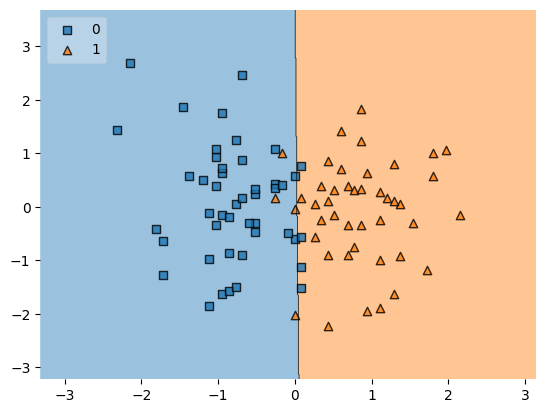

In [40]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [41]:
import pickle

In [42]:
pickle.dump(clf, open('model.pkl', 'wb'))